In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load dataset (update the path to where your CSV is stored)


df=pd.read_csv('train (3).csv')

In [7]:

# Selecting relevant columns
cols = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']
data = df[cols].dropna()


In [11]:
data.head()

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000


In [10]:
data.isnull().sum()

GrLivArea       0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64

In [12]:
# Splitting features and target

X=data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y=data['SalePrice']

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
# linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
#predictions
y_pred=model.predict(X_test)

In [16]:
#metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score:',r2_score(y_test,y_pred))



MAE: 35788.0612924363
MSE: 2806426667.247852
RMSE: 52975.717713381215
R2_score: 0.6341189942328374


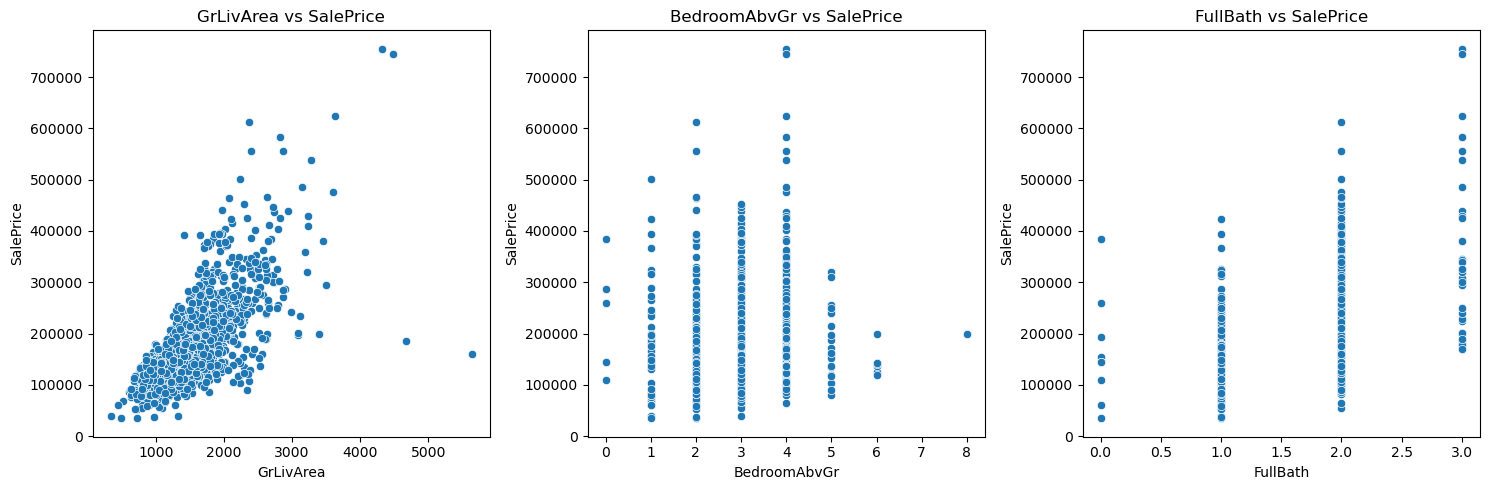

In [18]:
# Plot 1: Feature vs SalePrice relationship
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'])
plt.title('GrLivArea vs SalePrice')

plt.subplot(1, 3, 2)
sns.scatterplot(x=data['BedroomAbvGr'], y=data['SalePrice'])
plt.title('BedroomAbvGr vs SalePrice')

plt.subplot(1, 3, 3)
sns.scatterplot(x=data['FullBath'], y=data['SalePrice'])
plt.title('FullBath vs SalePrice')
plt.tight_layout()
plt.show()


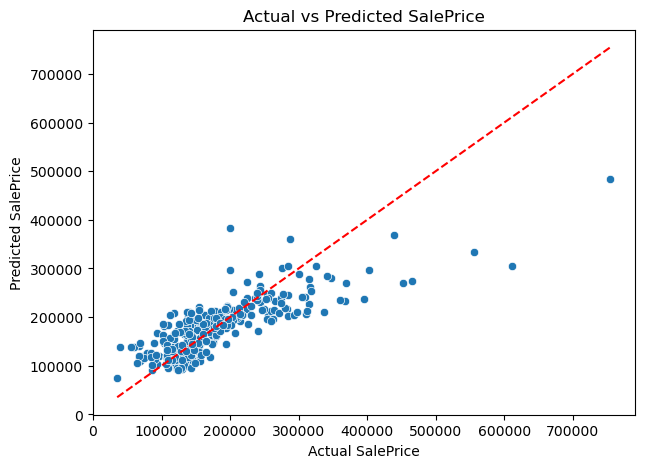

In [19]:
# Plot 2: Actual vs Predicted
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()



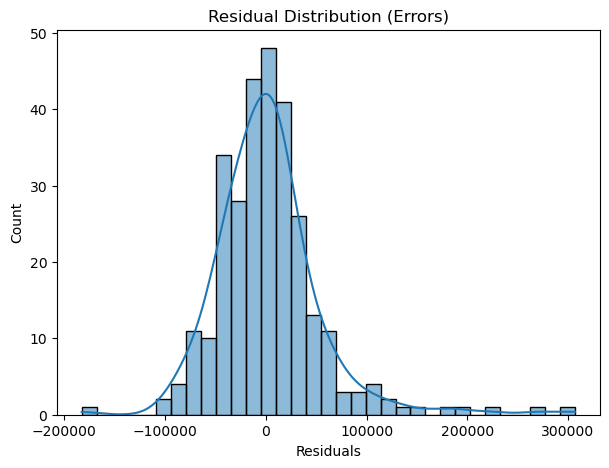

In [20]:
# Plot 3: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution (Errors)')
plt.xlabel('Residuals')
plt.show()